# Student Performance Prediction using Decison Tree Classifier

#### This project will use personal data collected from school reports and questionnaires to predict the student final exam performance



### Reference

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_math = pd.read_csv("student-mat.csv")

## Metadata

### Attributes
1.school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)  
2.sex - student's sex (binary: "F" - female or "M" - male)  
3.age - student's age (numeric: from 15 to 22)  
4.address - student's home address type (binary: "U" - urban or "R" - rural)  
5.famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)  
6.Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)  
7.Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
8.Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9.Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
10.Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
11.reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")  
12.guardian - student's guardian (nominal: "mother", "father" or "other")  
13.traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
14.studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15.failures - number of past class failures (numeric: n if 1<=n<3, else 4)  
16.schoolsup - extra educational support (binary: yes or no)  
17.famsup - family educational support (binary: yes or no)  
18.paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
19.activities - extra-curricular activities (binary: yes or no)  
20.nursery - attended nursery school (binary: yes or no)  
21.higher - wants to take higher education (binary: yes or no)  
22.internet - Internet access at home (binary: yes or no)  
23.romantic - with a romantic relationship (binary: yes or no)  
24.famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25.freetime - free time after school (numeric: from 1 - very low to 5 - very high)  
26.goout - going out with friends (numeric: from 1 - very low to 5 - very high)  
27.Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28.Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29.health - current health status (numeric: from 1 - very bad to 5 - very good)  
30.absences - number of school absences (numeric: from 0 to 93)

### Grades
31.G3 - final grade (binary: Pass or Fail, output target)  


In [3]:
# Get an overall view of data
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,Fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,Fail
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,Pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,Fail


In [4]:
# Check data for blanks and null value
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
#Convert columns with binary data to binary values
df_math['is_urban'] = df_math['address'].map({"U":1,"R":0})
df_math['famsize > 3'] = df_math['famsize'].map({"GT3":1,"LE3":0})
df_math['Pstatus_together'] = df_math['Pstatus'].map({"T":1,"A":0})

#Replace binary data values with 1 and 0
binary_columns = ['school','sex','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','Grade']

for x in binary_columns:
    df_math[x] = df_math[x].map({'no':0,'yes':1,'F':0,'M':1,'GP':0,'MS':1,'Fail':0,'Pass':1})


In [6]:
#Reclassify nominal data into binary form
df_math = pd.get_dummies(data=df_math,columns=['Mjob'])
df_math = pd.get_dummies(data=df_math,columns=['Fjob'])
df_math = pd.get_dummies(data=df_math,columns=['reason'])
df_math = pd.get_dummies(data=df_math,columns=['guardian'])

In [7]:
# Remove redundant columns
df_math = df_math.drop(['address', 'famsize','Pstatus'], axis=1)

In [8]:
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             395 non-null    int64
 1   sex                395 non-null    int64
 2   age                395 non-null    int64
 3   Medu               395 non-null    int64
 4   Fedu               395 non-null    int64
 5   traveltime         395 non-null    int64
 6   studytime          395 non-null    int64
 7   failures           395 non-null    int64
 8   schoolsup          395 non-null    int64
 9   famsup             395 non-null    int64
 10  paid               395 non-null    int64
 11  activities         395 non-null    int64
 12  nursery            395 non-null    int64
 13  higher             395 non-null    int64
 14  internet           395 non-null    int64
 15  romantic           395 non-null    int64
 16  famrel             395 non-null    int64
 17  freetime        

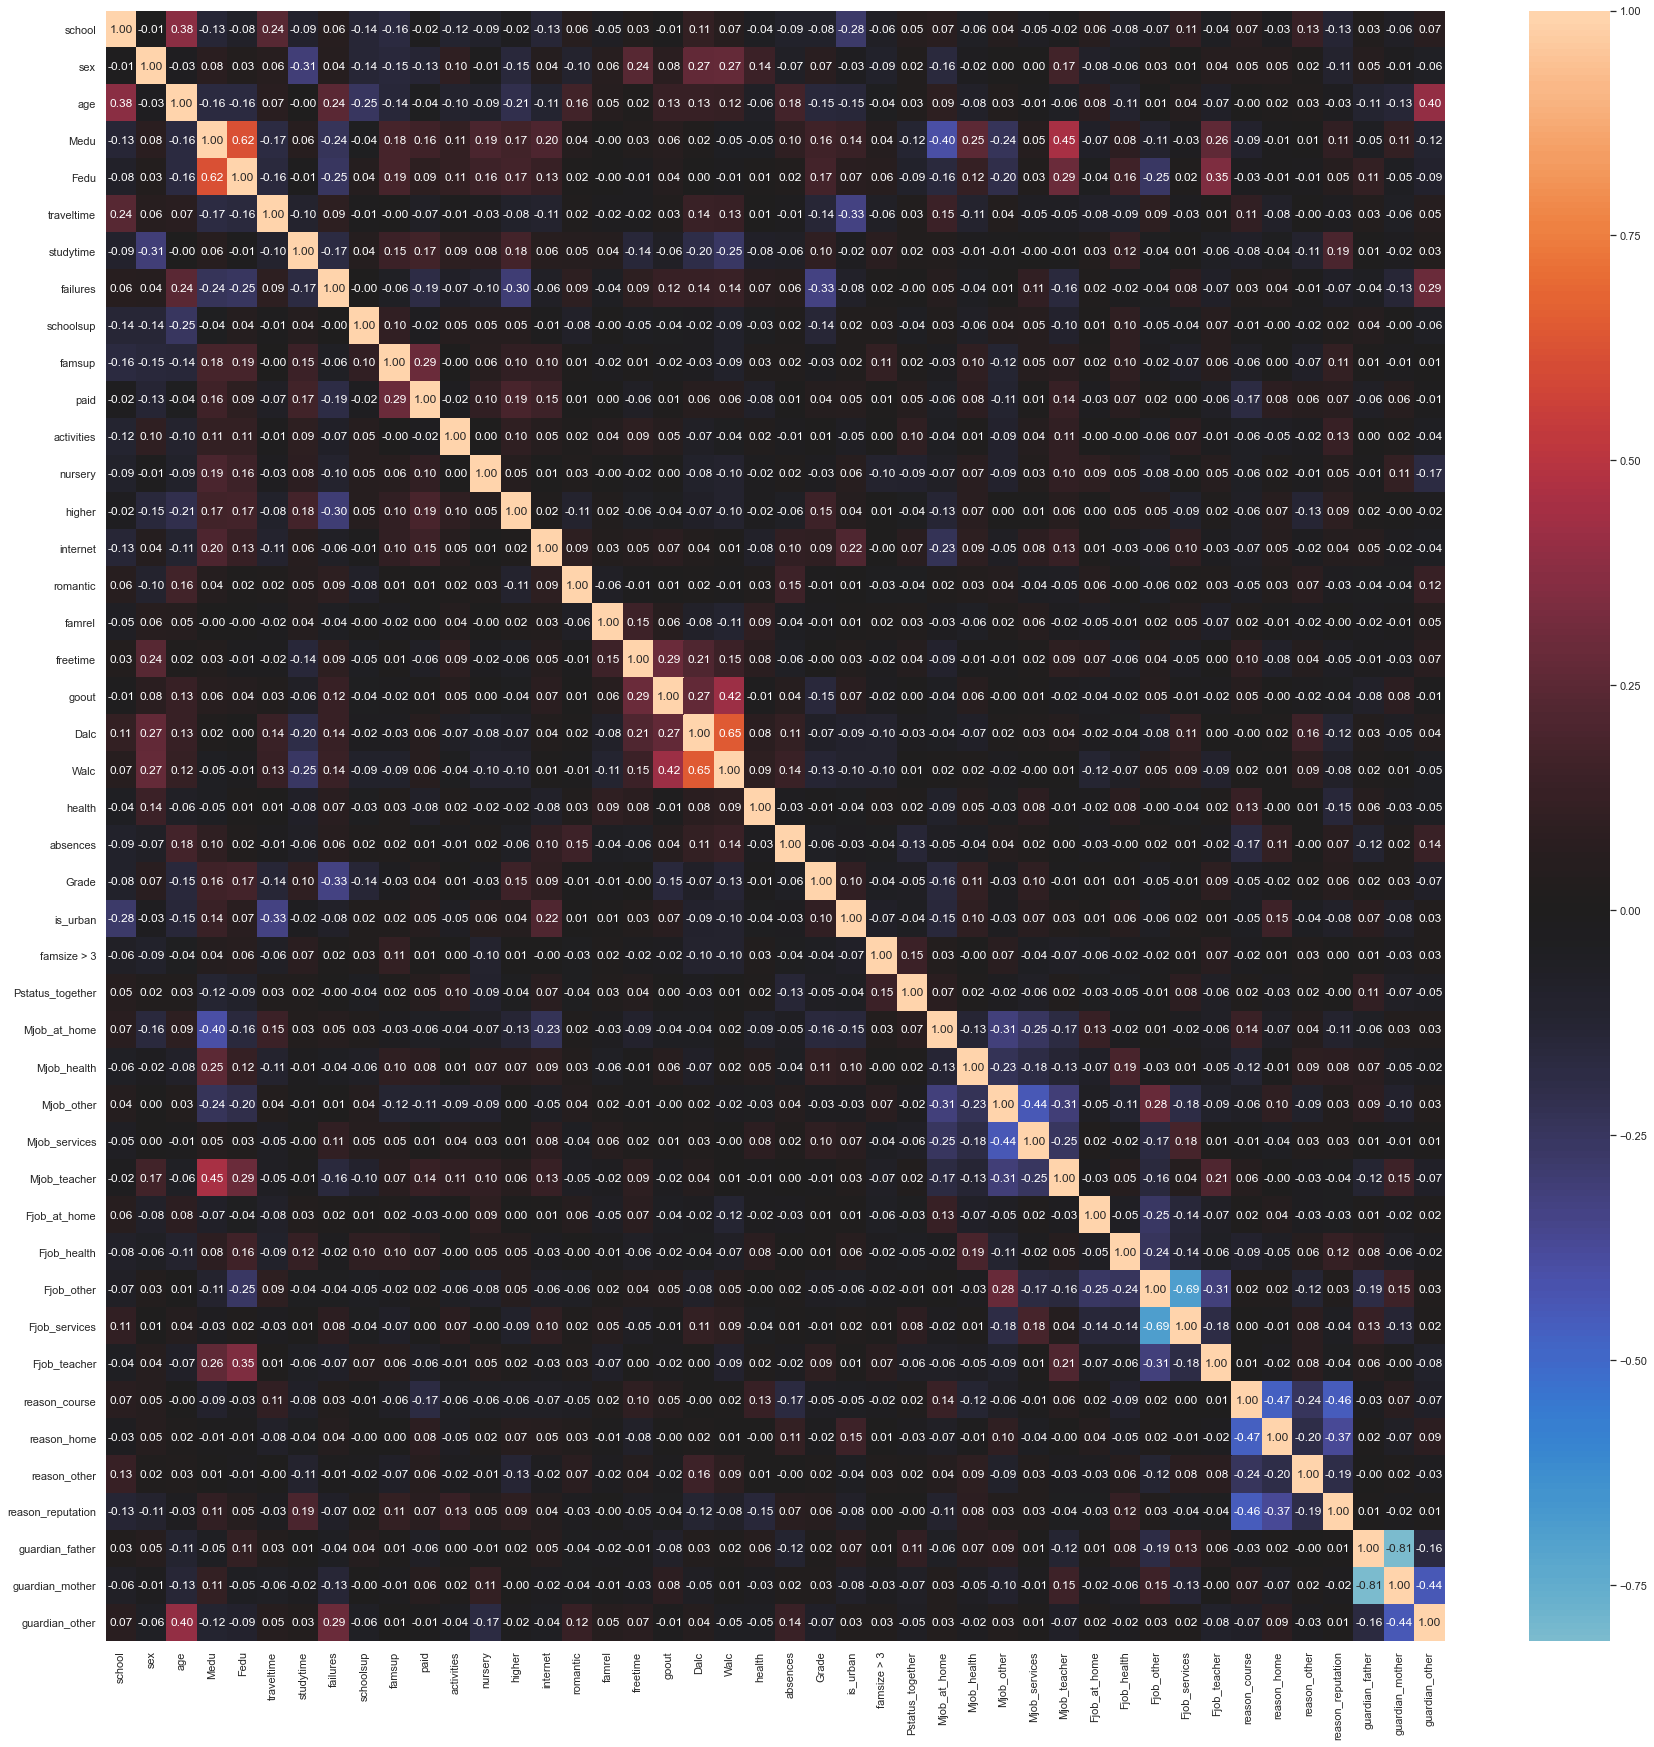

In [9]:
#Plot heatmap to find features that strongly correlates with Grade
corr = df_math.corr()
sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(corr, annot=True,fmt='.2f',center=0);

In [10]:
#Features not used for decision tree & have little correlation with target feature
drop = ['Grade','school','sex','famsup','paid','activities','nursery','romantic','famrel','freetime','health','famsize > 3','Mjob_other','Mjob_teacher','Fjob_at_home','Fjob_health','Fjob_services','reason_home','reason_other','guardian_father','guardian_mother','Fjob_other','reason_course']

In [11]:
#Drop feature not used for decision tree model
train_data=df_math.drop(drop,axis=1)

#Target variable to predict
train_label = df_math['Grade']


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   schoolsup          395 non-null    int64
 7   higher             395 non-null    int64
 8   internet           395 non-null    int64
 9   goout              395 non-null    int64
 10  Dalc               395 non-null    int64
 11  Walc               395 non-null    int64
 12  absences           395 non-null    int64
 13  is_urban           395 non-null    int64
 14  Pstatus_together   395 non-null    int64
 15  Mjob_at_home       395 non-null    uint8
 16  Mjob_health        395 non-null    uint8
 17  Mjob_services   

In [13]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=5,min_samples_leaf=5,criterion='entropy')

model.fit(train_data,train_label);

In [14]:
import graphviz

columns = list(train_data.columns)
dot_data = tree.export_graphviz(model,out_file=None, feature_names=columns,class_names=['Fail','Pass'],filled=True, rounded=True)

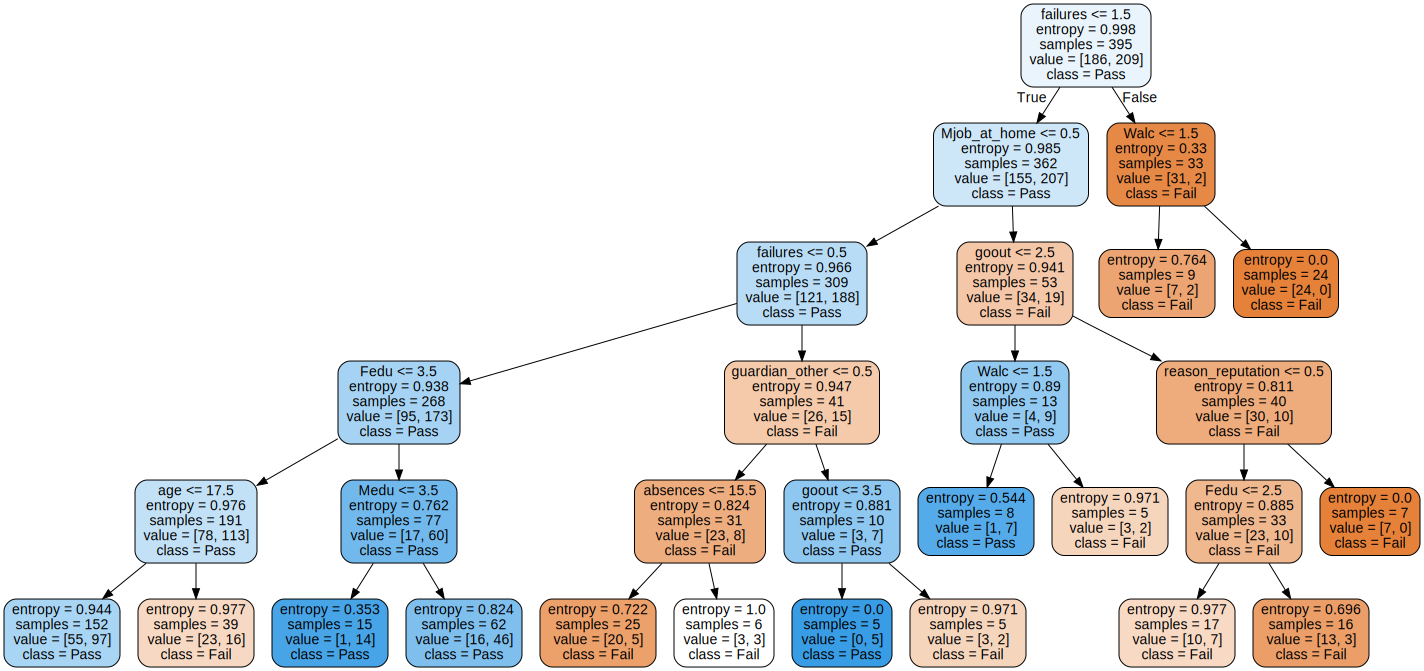

In [15]:
graph = graphviz.Source(dot_data,format="png")
graph

# What does the decision tree tell us?

## Brief overview

Each node has a feature ('failures','guardian_other' etc.) that is used as splitting criteria  
Color:            Blue = Pass, Orange = Fail  
Color Intensity:  How bias the sample towards one category  
Class:            The dominant category in a node  
Branch direction: Left = feature is true, Right = feature is false  
Entropy:          A measure of uncertainty. The lower, the better  

## From the information above, we can interpret the decision tree as so:

### Students that will pass the final exam have:
1) Number of past class failures less or than 0.5 (means never fail before)  
2) A mother who is at home  
3) Father with higher education  
4) Mother with secondary education and below  

### Students that will fail the final exam have:
1) Number of past class failures more than 2  
2) Weekend alcohol consmuption of more than 1.5 (low to very high)






In [19]:
# Test the accuracy of the model

from sklearn.model_selection import train_test_split

#split dataset into training and testing
#Train Dataset: Used to fit the machine learning model.
#Test Dataset: Used to evaluate the fit machine learning model
X_train, X_test, y_train, y_test = train_test_split(train_data,train_label,test_size=0.3, random_state=1)

model_acc = tree.DecisionTreeClassifier(max_depth=5,min_samples_leaf=5,criterion='entropy')
model_acc.fit(X_train,y_train);


In [20]:
#Prediction using test input data
y_pred = model_acc.predict(X_test)

In [21]:
# Measure accuracy
from sklearn import metrics
print(f"Accuracy: {round(metrics.accuracy_score(y_test,y_pred)*100,2)} %")

Accuracy: 68.91 %


In [22]:
# Testing prediction by loading a set of features

#Prepare dataframe
df_predict = train_data.iloc[0:0].copy()

#Load random row of data to dataframe
df_append = train_data.iloc[1,:]
df_predict = df_predict.append(df_append)

#Output prediction: 1 is Pass, 0 is Failed
model.predict(df_predict)

array([0], dtype=int64)

# How can this project benefit stakeholders?

### 1) School administrators can distribute resources (teachers, counsellors) more efficiently to focus more on students predicted to fail
### 2) The school board can strategize school programs and motivational camps to focus on issues that are critical to student's performance